In [43]:
#%pip install tensorflow

In [44]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [45]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [46]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [47]:
#csv1.describe()

In [48]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [49]:
data1 = data.drop(csv1.index[100:]) #reduce dataset to 10% of original dataframe
#data.head()

In [50]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
95,@HWI-D00360:5:H814YADXX:1:1101:6582:2134 1:N:0...,CAGTTTATCTTATTAATCTAGTGTTACCCTAATATAAAAACAATAA...,BBCDFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,363.375
96,@HWI-D00360:5:H814YADXX:1:1101:6746:2208 1:N:0...,AGGAAGGAAGCTTTGCCAGGAAGTTCAAATGTCAGGGACCTAGTTC...,CCCFFFFFHFHGFJGIIIJJJJJFHIJJIIIJJJJJJJJJIJJFHI...,832.833
97,@HWI-D00360:5:H814YADXX:1:1101:6514:2215 1:N:0...,AGATTAGCCGGGCGTGGTGGAAGGCGCCTATAGTCCCAGCTACTCG...,CCCFFFFFHGHGHJHIJGHJJJJJJJJJJJJJJJJJJJJJJJJJHH...,23371.750
98,@HWI-D00360:5:H814YADXX:1:1101:6718:2227 1:N:0...,CTTCTAACTGAAAAACGATGCCAGCTGTAGGACCCAGCTGCTCTTG...,CCCFFFFFHHHGFJHHHIIIIIIJJGGHIIJIIJJIJJIIJIJIII...,346.875
99,@HWI-D00360:5:H814YADXX:1:1101:6821:2106 1:N:0...,CTGGGAAAGACTTTGCTTCTCCTTCATATTTAAAGAATAACTTTGA...,?;?DDBDBCHBFDHB<<AEI<AFH@GIEHIFCHACDHIDC???FHI...,1141.041


In [51]:
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()

#seq_trans = le.fit_transform(data1["read_sequence"])
#seq_ide_trans = le.fit_transform(data1["sequence_identifier"])
#quali_trans = le.fit_transform(data1["quality"])


In [52]:
#data1['seq_encoded']=seq_trans
#data1['seq_id_encoded']=seq_ide_trans
#data1['qual_encoded']=quali_trans
#data1.head()

In [53]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
95,CAGTTTATCTTATTAATCTAGTGTTACCCTAATATAAAAACAATAA...,363.375
96,AGGAAGGAAGCTTTGCCAGGAAGTTCAAATGTCAGGGACCTAGTTC...,832.833
97,AGATTAGCCGGGCGTGGTGGAAGGCGCCTATAGTCCCAGCTACTCG...,23371.750
98,CTTCTAACTGAAAAACGATGCCAGCTGTAGGACCCAGCTGCTCTTG...,346.875


In [54]:
#Normalize data
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
95,CAGTTTATCTTATTAATCTAGTGTTACCCTAATATAAAAACAATAA...,2.560355
96,AGGAAGGAAGCTTTGCCAGGAAGTTCAAATGTCAGGGACCTAGTTC...,2.920558
97,AGATTAGCCGGGCGTGGTGGAAGGCGCCTATAGTCCCAGCTACTCG...,4.368691
98,CTTCTAACTGAAAAACGATGCCAGCTGTAGGACCCAGCTGCTCTTG...,2.540173


In [55]:
def Kmers_funct(seq, size=9): #148 characters/sequence  size = 6 better? Used 4 previously.[SIze = 9 gave a r_sq = 1 is this the best value for data = 250, train = 0.8 random = 42, ngaram 4,4]??
    #Performed much better with same settings and more data. used 1000. r_sq reduced to 0.9999999999999962
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)

In [56]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
Y = reads.iloc[:, 0].values # y_human for human_dna

In [57]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4) 
#: For ngram_range = (1,4) and fitting with all data rmsle = 0.3123797747684005, mse = 781905.5443143004, size = 9, data = 500, testsize = 0.8,random_state = 42
#: For ngram_range = (4,4) and fitting with all data rmsle = 0.27364484069740186, mse = 1041022.6402906085, size = 9, data = 500, testsize = 0.8,random_state = 42
#X = cv.fit_transform(human_texts)
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(ngram_range = (4,4))
X = tfid.fit_transform(human_texts)
#print(X)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (80, 13497)
X_test (20, 13497)
y_train (80,)
y_test (20,)


In [59]:
Xnew = X_train.todense()
Xnew.shape

(80, 13497)

In [60]:
X_train_original = np.expand_dims(Xnew, 2)

In [61]:
#X_train_original = np.expand_dims(X_train, 2)
#X_train_original = X_train.reshape(len(X_train), 1, X_train.shape[1])
#X_train_original = X_train.reshape((X_train.getnnz()),X_train.shape[1],1)
#X_train_original = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#X_train_original = X_train.reshape((X_train.todense()),X_train.shape[1],1)
#X_train_original = X_train.reshape((X_train.todense()),X_train.shape[1],1)

In [62]:
X_train_original.shape

(80, 13497, 1)

In [63]:
#XX_T = X_train_original **2  # squared, appears some values are negative
#XX_T.shape

In [64]:
import tensorflow as tf
from keras.optimizers import SGD
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, Dropout
#from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [65]:
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (X_train_original.shape[1:]), activation='relu')) #original filter size = 64 # 2 appears to avoid nan values
#model.add(Dropout(0.5))
#model.add(LSTM(8, activation = 'relu', return_sequences = True)) #original filter size 128 
#model.add(Conv1D(2, kernel_size= 2,padding = 'same',activation = 'relu')) #updated inputshape# changed again from 32 to 256
#model.add(Dropout(0.2))
model.add(Flatten()) # removing flatten introducing nan values and changes shape of output

model.add(Dense(1))

In [66]:
#X_train = tf.reshape(X_train,shape = [-1,250,3])
#y_train = tf.reshape(y_train,shape = [-1,250,1])


In [67]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 13497, 256)        264192    
                                                                 
 flatten_1 (Flatten)         (None, 3455232)           0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3455233   
                                                                 
Total params: 3,719,425
Trainable params: 3,719,425
Non-trainable params: 0
_________________________________________________________________


In [68]:
#X_train = tf.reshape(X_train,shape = [-1,375,3])
#y_train = tf.reshape(y_train,shape = [-1,125,1])

In [69]:
#y_train = np.expand_dims(y_train, 1) # Take off , see what happens

In [70]:
#input_ids = input_ids.toarray()

In [71]:
Xtstnew = X_test.todense()
X_test_n = np.expand_dims(Xtstnew, 2)

In [72]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

In [73]:
history = model.fit(X_train_original, y_train, 
                    epochs=1000, verbose=1, batch_size=32, validation_split = 0.2,callbacks = [callback] ) #changed batch_size to 2 intitally 50 #validation_data = (X_test_n,y_test)

Epoch 1/1000
2/2 [==============================] - 33s 16s/step - loss: 6.1832 - accuracy: 0.0000e+00 - val_loss: 3.9610 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 30s 17s/step - loss: 1.8083 - accuracy: 0.0000e+00 - val_loss: 1.2877 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 30s 16s/step - loss: 1.6278 - accuracy: 0.0000e+00 - val_loss: 0.6629 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 29s 16s/step - loss: 0.4722 - accuracy: 0.0000e+00 - val_loss: 1.4552 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 30s 16s/step - loss: 0.9823 - accuracy: 0.0000e+00 - val_loss: 0.2189 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [==============================] - 30s 16s/step - loss: 0.4292 - accuracy: 0.0000e+00 - val_loss: 0.5597 - val_accuracy: 0.0000e+00
Epoch 7/1000
2/2 [==============================] - 30s 16s/step - loss: 0.5875 - accuracy: 0.0000e+00 - v

In [74]:
#Xtstnew = X_test.todense()
#X_test_n = np.expand_dims(Xtstnew, 2)

In [75]:
ypred = model.predict(X_test_n)

1/1 [==============================] - 3s 3s/step


In [76]:
ypred.shape

(20, 1)

In [77]:
#print(ypred)

In [78]:
ypred_train = model.predict(X_train_original)

3/3 [==============================] - 10s 3s/step


In [79]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,ypred_train)
r2_train

0.7791466699399293

In [80]:
r2_test = r2_score (y_test,ypred)
r2_test 

-0.08022856874885465

In [81]:
from sklearn.metrics import mean_squared_error
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 0.1505


In [82]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,ypred)**0.5
rmsle

0.09485512931259404

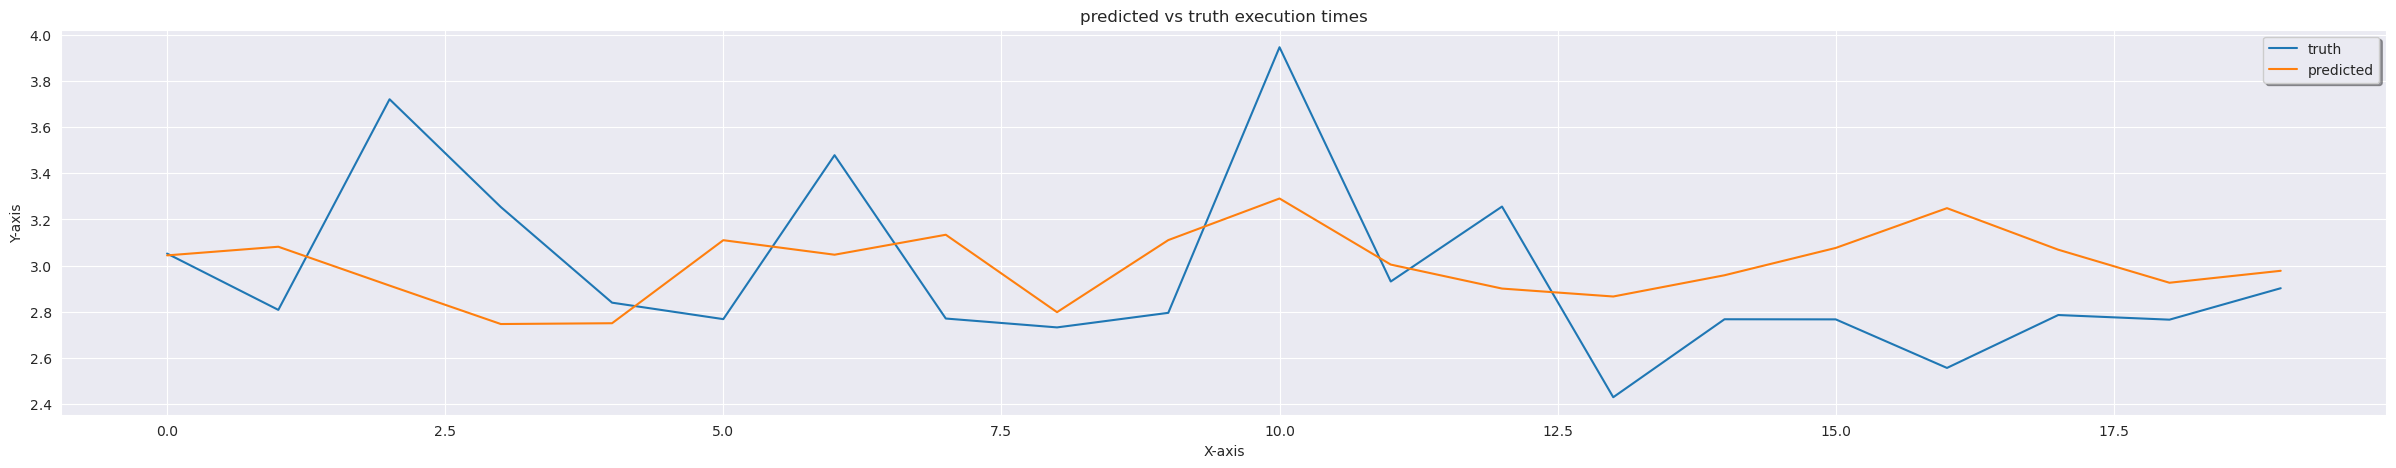

In [83]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test, label="truth")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [84]:
y_pred_non_log = 10**(ypred)
y_test_non_log = 10**(y_test)

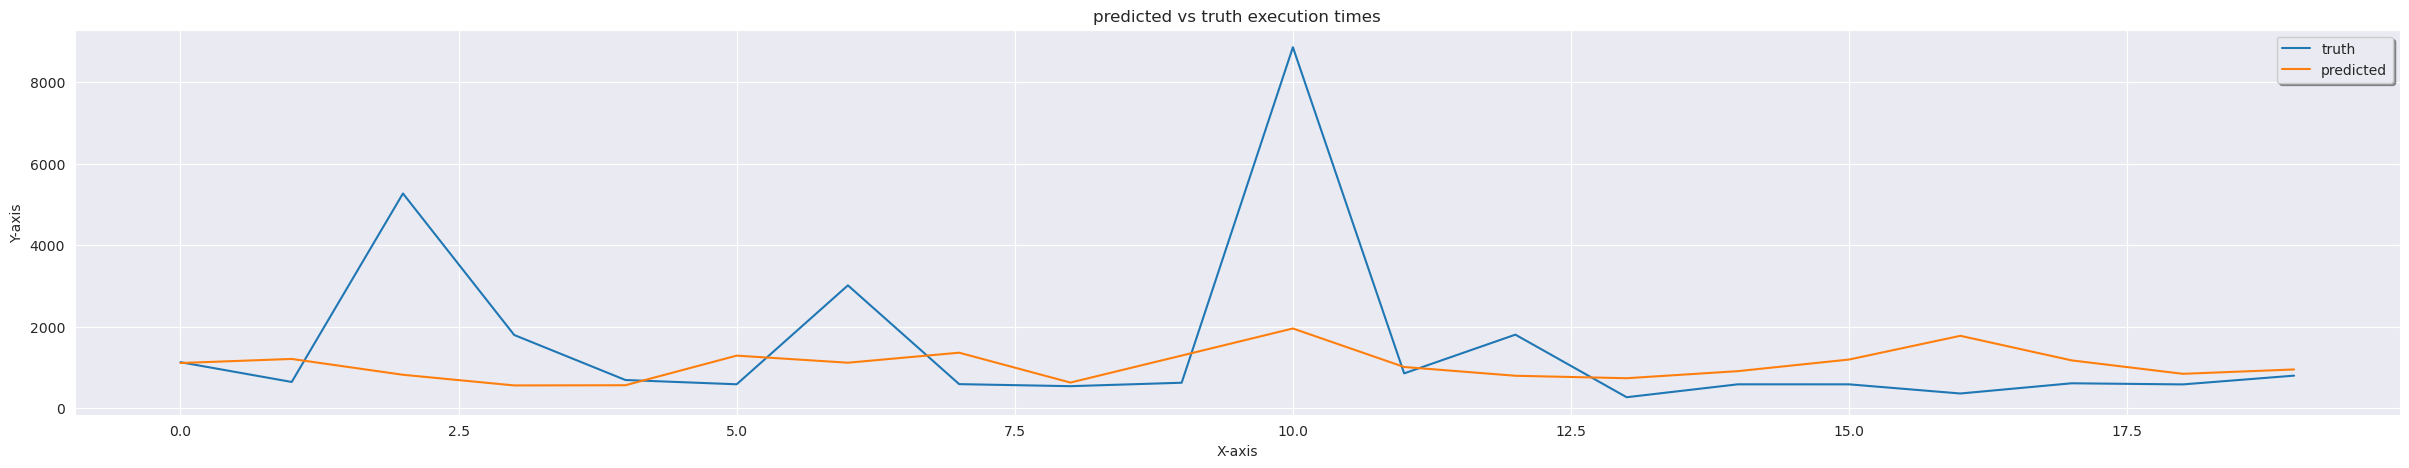

In [85]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

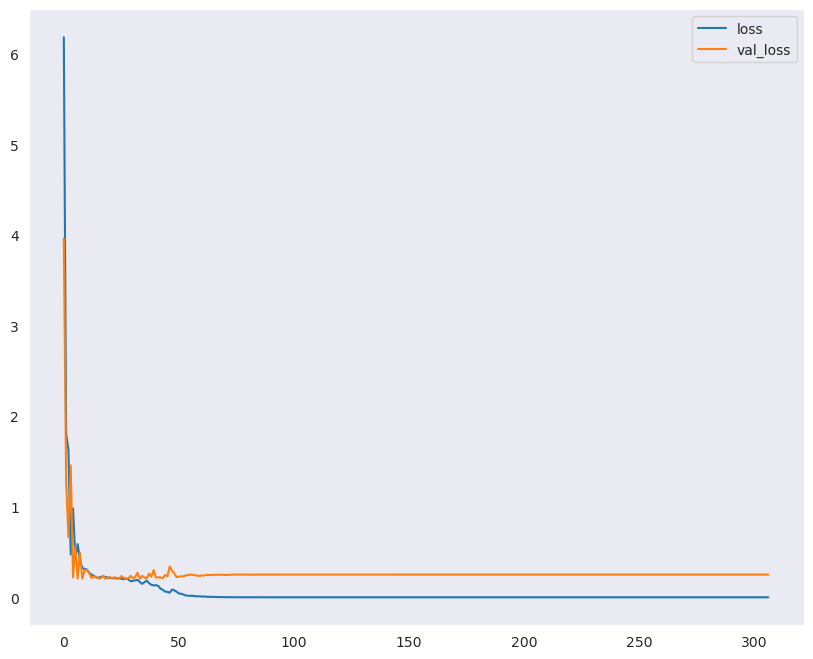

In [86]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
#plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
#plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()